<a href="https://colab.research.google.com/github/futartup/S11-assignment/blob/master/custom_schedulers.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# One Cycle Policy LR finder and plot the graph as well. This is a function which returns the LR according to the one cycle policy

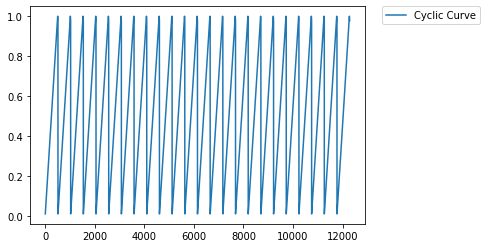

In [16]:
import math
import matplotlib.pyplot as plt
from torch.optim import Optimizer
import torch.nn as nn


# Class implementing Cycle LR policy by Leslie Smith ( LeslieSmithCyclicLR )
class LeslieSmithCyclicLR:
  def __init__(self, 
               optimizer: Optimizer=None, 
               lr_range: tuple=(0.1, 1.0), 
               num_steps: int = 1,
               num_cycles: int = 1):
    # Sanity check
    # if not isinstance(optimizer, Optimizer):
    #   raise TypeError('{} is not an optimizer'.format(optimizer.__name__))
    # self.optimizer = optimizer

    self.num_steps = num_steps

    assert len(lr_range) == 2, "The lr range should contain both min and max lr"
    assert lr_range[0] < lr_range[1], "The first element of the range should be \
    less than the second element"
    self.min_lr, self.max_lr = lr_range[0], lr_range[1]

    assert num_steps > 0, " The num_steps should be greater than 0"
    self.num_steps = num_steps

    self.num_cycles = num_cycles
    
    self.lr_array = []

    self.increase = True
    self.decrease = False
  
  def state_dict(self):
    """
    Returns the state of the scheduler as a :class:`dict`.
    It contains an entry for every variable in self.__dict__ which
    is not the optimizer. (Borrowed from _LRScheduler class in torch.optim.lr_scheduler.py)
    """
    return {key: value for key, value in self.__dict__.items() if key != 'optimizer'}

  def load_state_dict(self, state_dict):
    """
    Loads the schedulers state. (Borrowed from _LRScheduler class in torch.optim.lr_scheduler.py)
    Arguments:
            state_dict (dict): scheduler state. Should be an object returned
            from a call to :meth:`state_dict`.
    """
    self.__dict__.update(state_dict)

  def get_lr(self):
    return self.optimizer.param_groups[0]['lr']

  def plot_graph(self):
    plt.plot(self.lr_array)
    plt.legend(['Cyclic Curve'],
                loc='upper left',
                bbox_to_anchor=(1.05, 1), borderaxespad=0.)
    plt.show()

  def get_momentum(self):
    return self.optimizer.param_groups[0]['momentum']

  def step(self, iteration):
    """
    update of the learning rate
    """  
    stepsize = self.num_steps / 2
    cycle = math.floor(1+ iteration/(2*stepsize))
    x =  math.fabs(iteration/stepsize - 2*cycle + 1)
    lr_new = self.min_lr + (self.max_lr - self.min_lr)*(1 - x)
 
    #print("Learning Rate: {0} at epoch : {1}".format(lr_new, epoch))
    self.lr_array.append(lr_new)
    #self.optimizer.param_groups[0]['lr'] = lr_new



obj = LeslieSmithCyclicLR(None, (0.01, 1.0), 1000)
for i in range(24):
  for j in range(512):
    obj.step(j)

obj.plot_graph()